# ROHIT MITHBAVKAR

# **Introduction: Predicting Bike Rent Demand Using Machine Learning**

### Bike renting business, also known as bike sharing or bike rental, has gained significant popularity in urban areas around the world. It offers an alternative and eco-friendly mode of transportation for short trips, commuting, or leisure activities. In a bike renting business, customers can typically rent bicycles from designated stations or hubs located throughout the city. These stations are equipped with racks or docking systems where customers can pick up and return bikes.

### The concept of bike renting has evolved with the advent of technology, particularly mobile apps and GPS tracking systems, making it convenient for users to locate and unlock bikes using their smartphones. This convenience, coupled with growing concerns about traffic congestion, pollution, and the need for sustainable transportation options, has contributed to the increasing demand for bike rental services.

### From a business perspective, bike renting companies typically operate on a membership or pay-per-use model, where customers can either subscribe to a monthly or annual membership plan or pay for each ride. Revenue is generated through membership fees, usage fees, sponsorships, and partnerships with local businesses or municipalities.

### In this machine learning project focusing on bike renting data, the objective includes predicting the demand for bikes based on various factors such as weather conditions, time of day, day of the week, and special events. By analyzing historical rental data and external factors like temperature, humidity, and seasonality, businesses can optimize bike availability, pricing strategies, and resource allocation to meet customer demand effectively. This can lead to improved operational efficiency, customer satisfaction, and profitability in the bike renting industry.

### **Dataset Information**
* Number of instances: 8761
* Number of attributes: 14
---

### **Features information:**
### The dataset contains features like:

Sure, let's break down each feature:

1. **Date**: This represents the date on which the data was recorded. It provides temporal information and can be useful for analyzing trends over time.

2. **Rented Bike Count**: This is the target variable or dependent feature in your machine learning project. It represents the number of bikes rented during a specific hour on the given date.

3. **Hour**: This indicates the hour of the day when the data was recorded. It provides temporal granularity and can influence bike rental patterns based on factors such as commuting hours, leisure time, or night-time activities.

4. **Temperature(°C)**: This is the temperature in Celsius recorded at the time of data collection. Temperature can impact bike rental behavior, with more people likely to rent bikes on pleasant weather days.

5. **Humidity(%)**: This represents the relative humidity recorded at the time of data collection. Humidity levels can affect comfort levels for outdoor activities, potentially influencing bike rental decisions.

6. **Wind speed (m/s)**: This is the wind speed measured in meters per second. Windy conditions may deter some individuals from cycling, particularly if the wind speed is high.

7. **Visibility (10m)**: This indicates the visibility measured in meters. Poor visibility due to fog, haze, or other atmospheric conditions may impact safety and affect bike rental activity.

8. **Dew point temperature(°C)**: The dew point temperature is the temperature at which air becomes saturated with moisture, leading to the formation of dew. It provides information about atmospheric moisture levels.

9. **Solar Radiation (MJ/m2)**: Solar radiation refers to the energy received from the sun per unit area. It can influence temperature and weather conditions, which in turn may affect bike rental behavior.

10. **Rainfall(mm)**: This represents the amount of rainfall measured in millimeters during the hour. Rainy conditions are typically associated with reduced bike rental activity due to concerns about getting wet.

11. **Snowfall (cm)**: Similar to rainfall, snowfall indicates the amount of snow recorded during the hour. Snowy conditions can significantly impact cycling and may lead to decreased bike rental demand.

12. **Seasons**: This feature categorizes the season in which the data was recorded (e.g., spring, summer, fall, winter). Seasonality can have a significant influence on bike rental patterns due to weather variations and seasonal activities.

13. **Holiday**: Indicates whether the date corresponds to a holiday or not. Holidays may affect bike rental behavior, with increased demand during holidays for leisure activities or decreased demand during certain public holidays.

14. **Functioning Day**: This feature indicates whether the day is a functioning day or not. It may be used to distinguish between regular working days and weekends or holidays, which can impact bike rental patterns.

---
### **Target Variable**

**Rented Bike Count**: This is the target variable or dependent feature in your machine learning project. It represents the number of bikes rented during a specific hour on the given date.

### **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor

import warnings
warnings.filterwarnings('ignore')

### **2. Loading Data**

In [2]:
# Loading dataset and creating dataframe

df = pd.read_csv(r'C:\Users\Rohit\Downloads\SeoulBikeData.csv', encoding='unicode_escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Shape of dataset

df.shape

(8760, 14)

* **Number of records: 8760**
* **Number of features: 14**

In [6]:
# Lets have a look at the colulms

print('The columns in the dataset are:\n',df.columns)

The columns in the dataset are:
 Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [7]:
# Let's have a look on data types of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* **The data types we have are object, float and integers.**
* **There are 6 features having float and 3 features having integers data types and 4 features having object data type.**

In [3]:
from datetime import datetime
from datetime import date

In [4]:
# Convert date column to datetime datatype

df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d-%m-%Y'))

In [10]:
# Let's see the descriptive stats of all the features

df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


### **3. Exploratory Data Analysis**

In [11]:
# Lets separate columns by datetime dor visualization
categorical_columns = df.select_dtypes(include=['object'])
numerical_columns = df.select_dtypes(include=['int', 'float'])
date_coulums = df.select_dtypes(include=['datetime'])

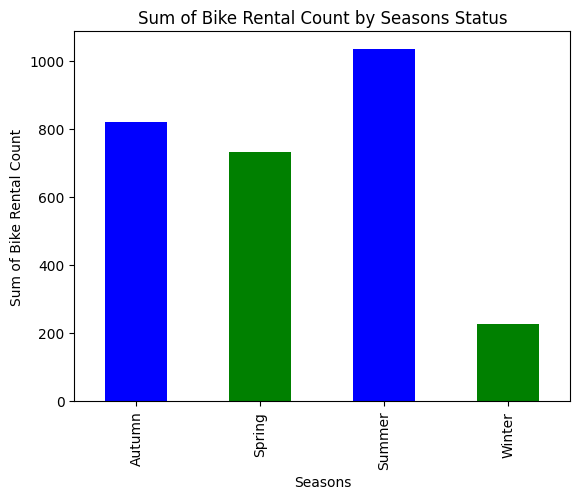

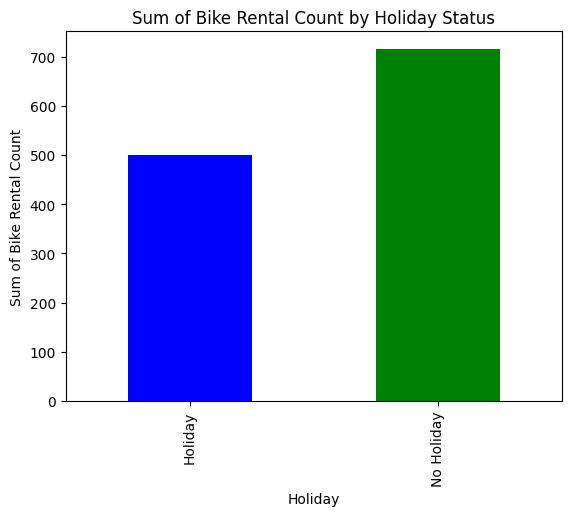

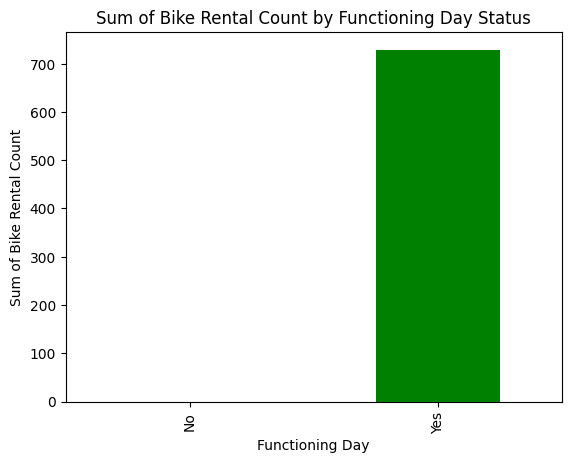

In [12]:
for i in categorical_columns:
    rental_count_by_holiday = df.groupby(i)['Rented Bike Count'].mean()

    # Plotting the column chart
    rental_count_by_holiday.plot(kind='bar', color=['blue', 'green'])

    # Adding labels and title
    plt.xlabel(i)
    plt.ylabel('Sum of Bike Rental Count')
    plt.title(f'Sum of Bike Rental Count by {i} Status')

    # Displaying the plot
    plt.show()

**From first chart we can tell more bikes are being rented in summer while less bike are being rented in winter.**

**From second chart we can see more bikes are rented on no holiday but as we know count of no holiday is significantly more that holiday.**

**In third chart we can see people rented bike on fumctioning day.**

<BarContainer object of 8760 artists>

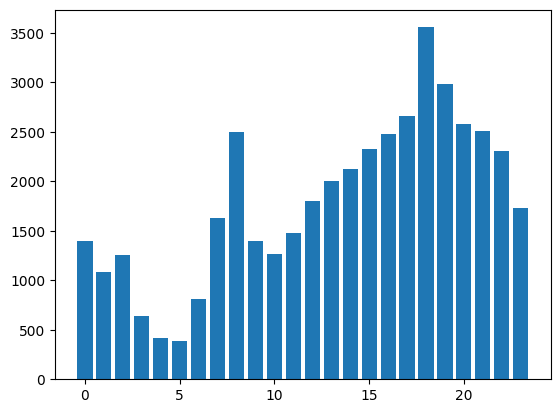

In [13]:
# Create bar chart

plt.bar(df['Hour'],df['Rented Bike Count'])

**rate of renting bikes increases from 1pm(13hr), 6pm(18hr) is hour when most bikes are rented**

In [30]:
# Extract month from date column

df['Month'] = df['Date'].dt.month

<BarContainer object of 8760 artists>

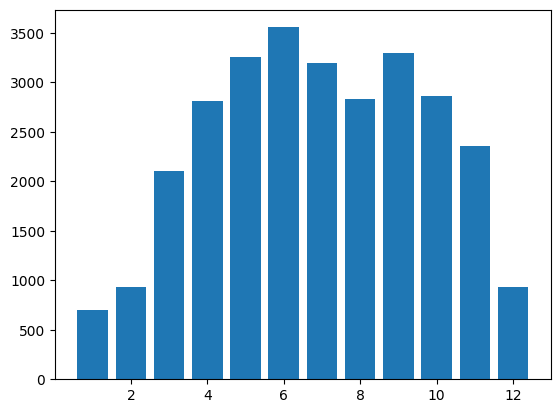

In [15]:
# Create bar chart

plt.bar(df['Month'],df['Rented Bike Count'])

**From may to october bike renting rate is high**

<BarContainer object of 8760 artists>

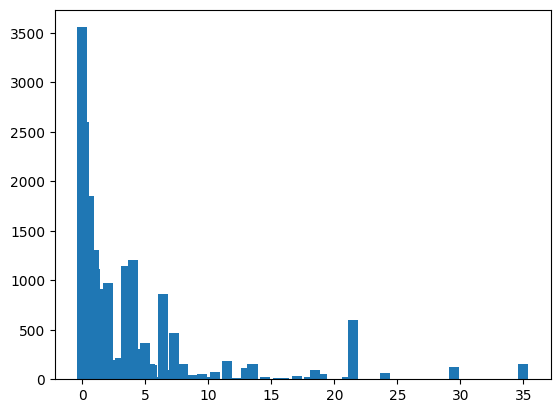

In [16]:
# Create Bar chart

plt.bar(df['Rainfall(mm)'],df['Rented Bike Count'])

**Rainfall has affected bike renting, low rainfall has high baike renting rate**

Text(0.5, 1.0, 'Heatmap')

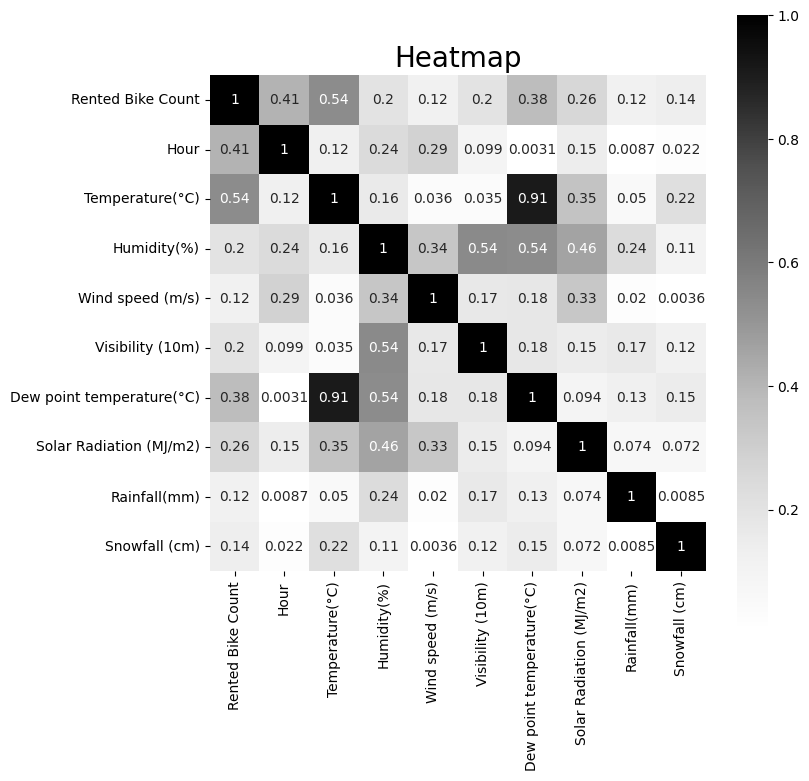

In [17]:
plt.figure(figsize=(8,8))

# Create Correlation chart

sns.heatmap(abs(df.iloc[:,1:11].corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

**Only Temperature and Hour has considerable correlation wit our arget variable 'Rented Bike Count'**

**There is correlation between Temperature and Dew point Temperature(°C)**

### **4. Data Wrangling**

In [20]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**We dont have any missing values in our dataset.**

**Converting categorical data into machine redable data**

In [5]:
# Let's make copy of dataframe
bike_df = df.copy()

In [6]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**We have dichotomous in Holiday and Functioning Day we can convert them into 0 nad 1**

In [7]:
df['Holiday'] = df['Holiday'].replace('No Holiday',0)
df['Holiday'] = df['Holiday'].replace('Holiday',1)

In [8]:
df['Functioning Day'] = df['Functioning Day'].replace('No',0)
df['Functioning Day'] = df['Functioning Day'].replace('Yes',1)

**For Seasons we can use one hot key encoding as we have nominal data in this feature**

In [9]:
categorical_columns2 = bike_df.select_dtypes(['object'])

In [10]:
encoded = pd.get_dummies(categorical_columns2, dtype='int64')

In [11]:
encoded.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1


**Dropping unnecessary coulumns**

**• dropping categorical data which has been converted into numerical data**

**• dropping date**

**• Dew point temperature(°C) because its correlated with Temperature(°C) we can keep only one**

In [12]:
bike_df.drop(categorical_columns2,axis=1,inplace=True)
bike_df.drop('Date', axis=1, inplace=True)
bike_df.drop('Dew point temperature(°C)', axis=1, inplace=True)

**Let's concatenate our encoded dataframe with datframe that has only numerical columns**

In [13]:
bike_df = pd.concat([bike_df,encoded],axis = 1)

### **Now our dataset is ready for modelling.**

### **5. Splitting the data and Standardization**

In [14]:
X = bike_df.drop(columns='Rented Bike Count')
y = bike_df['Rented Bike Count']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(7008, 16), X_test=(1752, 16)
The shapes of train and test set for dependent variables are: y_train=(7008,), y_test=(1752,)


In [17]:
# before transformation 

X_train.values

array([[15. ,  8.2, 62. , ...,  1. ,  0. ,  1. ],
       [18. , 28.4, 57. , ...,  1. ,  0. ,  1. ],
       [11. , 29.9, 57. , ...,  1. ,  0. ,  1. ],
       ...,
       [11. , 25.5, 57. , ...,  1. ,  0. ,  1. ],
       [ 0. ,  8.3, 59. , ...,  1. ,  0. ,  1. ],
       [20. ,  7.1, 83. , ...,  1. ,  0. ,  1. ]])

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**We are using StandardScaler to scale the data**

In [19]:
# after transformation

X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ...,  0.23202281,
        -0.18254726,  0.18254726],
       [ 0.9408263 ,  1.29850393, -0.05608294, ...,  0.23202281,
        -0.18254726,  0.18254726],
       [-0.06968702,  1.42379477, -0.05608294, ...,  0.23202281,
        -0.18254726,  0.18254726],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ...,  0.23202281,
        -0.18254726,  0.18254726],
       [-1.65763652, -0.38039334,  0.0423343 , ...,  0.23202281,
        -0.18254726,  0.18254726],
       [ 1.22954439, -0.48062601,  1.22334111, ...,  0.23202281,
        -0.18254726,  0.18254726]])

### **6. Fitting models**

* **In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor.**

* **The detailed step we will be following are as follows:**

1. **Initial fitting of the model.**

2. **Evaluating the performance of the model using metrics.**

3. **Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.**

**6.1 Decision Tree Regressor**

In [20]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
y_train_prediction = dt_model.predict(X_train)
y_predicted = dt_model.predict(X_test)

In [22]:
# train results

print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction))
print('r2_score - ',r2_score(y_train, y_train_prediction))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  0.0
r2_score -  1.0
mean_absolute_error 0.0
root_mean_squared_error -0.0


In [23]:
# test results

print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted))
print('r2_score - ',r2_score(y_test, y_predicted))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  101865.4098173516
r2_score -  0.7566071399071905
mean_absolute_error 183.81164383561645
root_mean_squared_error 319.1636097949633


**Let's store metric values of train and test set for later comparisons.**

In [24]:
# train values before hypertune

dict1 = {'model' : 'Decision Tree Regressor - train, before hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction),
         'r2_score' : r2_score(y_train, y_train_prediction),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction)}

In [25]:
# test values before hypertune

dict2 = {'model' : 'Decision Tree Regressor - test, befor hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted),
         'r2_score' : r2_score(y_test, y_predicted),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted)}

**• From evaluation metrics result we can conclude our model is overfitting**

**• We need to do hyperparameter tunning to prevent overfitting**

**Cross-validation using GridSearch**

In [26]:
# Setting the parameters to tune

param_dict = {"criterion":['squared_error', 'absolute_error'],
              "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24]}

In [27]:
grid = GridSearchCV(dt_model,param_grid=param_dict,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 21, 22, 23,
                                       24]})

In [28]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=10)

In [142]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 10}

In [29]:
grid.best_score_

0.81581847960589

In [30]:
dt_model_tunned = grid.best_estimator_

In [31]:
y_train_prediction2  =dt_model_tunned.predict(X_train)
y_predicted2  =dt_model_tunned.predict(X_test)

In [32]:
# train results

print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction2))
print('r2_score - ',r2_score(y_train, y_train_prediction2))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction2))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction2))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  46826.93286673355
r2_score -  0.8872300543563425
mean_absolute_error 128.91925659125258
root_mean_squared_error -216.39531618483232


In [33]:
# test results

print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted2))
print('r2_score - ',r2_score(y_test, y_predicted2))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted2))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted2))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  76213.670479899
r2_score -  0.8178983104320287
mean_absolute_error 168.93605070894003
root_mean_squared_error 276.0682351881487


**Let's store metric values of train and test set for later comparisons.**

In [34]:
dict3 = {'model' : 'Decision Tree Regressor - train, after hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction2),
         'r2_score' : r2_score(y_train, y_train_prediction2),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction2),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction2)}

In [35]:
dict4 = {'model' : 'Decision Tree Regressor - test, After hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted2),
         'r2_score' : r2_score(y_test, y_predicted2),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted2),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted2)}

**6.2 Random Forest Regressor**

In [36]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
y_train_prediction = rf_model.predict(X_train)
y_predicted = rf_model.predict(X_test)

In [38]:
# train results
print('The evaluation metric values for training set - Random Forest:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction))
print('r2_score - ',r2_score(y_train, y_train_prediction))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction))


The evaluation metric values for training set - Random Forest:
mean_squared_error -  7274.785080579338
r2_score -  0.9824806565819512
mean_absolute_error 52.29991866438356
root_mean_squared_error -85.29235065689852


In [39]:
# test results

print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted))
print('r2_score - ',r2_score(y_test, y_predicted))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  54305.250341324194
r2_score -  0.8702453539201345
mean_absolute_error 141.48986301369862
root_mean_squared_error 233.0348693679214


**Let's store metric values of train and test set for later comparisons.**

In [40]:
# train values before hypertune

dict5 = {'model' : 'Random Forest Regressor - train, before hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction),
         'r2_score' : r2_score(y_train, y_train_prediction),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction)}

In [41]:
# test values before hypertune

dict6 = {'model' : 'Random forest Regressor - test, befor hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted),
         'r2_score' : r2_score(y_test, y_predicted),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted)}

**• From evaluation metrics result we can conclude our model is overfitting**

**• We need to do hyperparameter tunning to prevent overfitting**

**Cross-validation using GridSearch**

In [42]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

In [43]:
rf_random = GridSearchCV(estimator=rf_model,param_grid= param_dict1,cv = 5,n_jobs=-1)
rf_random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 14, 16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [80, 100, 120, 140, 160, 180]})

In [143]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=22, n_estimators=160)

In [144]:
rf_random.best_score_

0.870725479131686

In [145]:
rf_model_tunned = rf_random.best_estimator_

In [146]:
y_train_prediction2 = rf_model_tunned.predict(X_train)
y_predicted2 = rf_model_tunned.predict(X_test)

In [147]:
# train results
print('The evaluation metric values for training set - Random Forest:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction2))
print('r2_score - ',r2_score(y_train, y_train_prediction2))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction2))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction2))

The evaluation metric values for training set - Random Forest:
mean_squared_error -  7336.068156300786
r2_score -  0.9823330729437562
mean_absolute_error 52.397406382438255
root_mean_squared_error -85.65085029525852


In [148]:
# test results

print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted2))
print('r2_score - ',r2_score(y_test, y_predicted2))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted2))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted2))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  53747.98926009102
r2_score -  0.871576849750004
mean_absolute_error 140.97313315301685
root_mean_squared_error 231.8361258736244


**let's store the scores of RandomSearch for later comparisons.**

In [150]:
dict7 = {'model' : 'Random Forest Regressor - train, fter hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction2),
         'r2_score' : r2_score(y_train, y_train_prediction2),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction2),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction2)}

In [151]:
dict8 = {'model' : 'Random Forest Regressor - test, After hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted2),
         'r2_score' : r2_score(y_test, y_predicted2),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted2),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted2)}

**6.3 XGBRF Regressor**

In [52]:
xgb_model=XGBRFRegressor()
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [53]:
y_train_prediction = xgb_model.predict(X_train)
y_predicted = xgb_model.predict(X_test)

In [54]:
# train results
print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction))
print('r2_score - ',r2_score(y_train, y_train_prediction))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  81303.25962088369
r2_score -  0.8042031880628958
mean_absolute_error 186.80820380042405
root_mean_squared_error -285.1372645251471


In [55]:
# test results

print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted))
print('r2_score - ',r2_score(y_test, y_predicted))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  88791.53998531481
r2_score -  0.7878452861690681
mean_absolute_error 194.41786777564923
root_mean_squared_error 297.97909320171243


**let's store the scores of evaluetion metrics for later comparisons.**

In [56]:
# train values before hypertune

dict9 = {'model' : 'XGB Regressor - train, before hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction),
         'r2_score' : r2_score(y_train, y_train_prediction),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction)}

In [57]:
# test values before hypertune

dict10 = {'model' : 'XGB Regressor - tret, befor hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted),
         'r2_score' : r2_score(y_test, y_predicted),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted)}

**• From evaluation metrics result we can conclude our model is underfitting**

**• We need to do hyperparameter tunning to prevent overfitting**

**Cross-validation using GridSearch**

In [58]:
# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# gamma
gamma=list(np.linspace(10,20,num=20))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [59]:
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,n_jobs=-1,random_state=12)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                                  17.36842105263158,
                                                  17.894736842105264,
                                                  18.421052631578945,
                                                  18.94736842105263,
                                                  19.473684210526315, 20.0],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                                                          0.13, 0.14],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [5, 7, 9, 11, 13],
                                        'subsample': [0.3, 0.5, 0.6]},
                   random_state=12)

In [60]:
xgb_random.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=12.105263157894736,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.14, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=13, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=13, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [61]:
xgb_random.best_score_

0.22151846133825778

In [62]:
xgb_model_tunned = xgb_random.best_estimator_

In [63]:
y_train_prediction2 = xgb_model_tunned.predict(X_train)
y_predicted2 = xgb_model_tunned.predict(X_test)

In [64]:
# train results
print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction2))
print('r2_score - ',r2_score(y_train, y_train_prediction2))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction2))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction2))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  315844.0674950709
r2_score -  0.23937537347029325
mean_absolute_error 451.8844554500493
root_mean_squared_error -562.0000600489923


In [65]:
# test results

print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted2))
print('r2_score - ',r2_score(y_test, y_predicted2))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted2))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted2))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  324480.7585626313
r2_score -  0.22469953232161322
mean_absolute_error 458.67157449243274
root_mean_squared_error 569.6321256413048


**lets store result**

In [66]:
dict11 = {'model' : 'XGB Regressor - tarin, after hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction2),
         'r2_score' : r2_score(y_train, y_train_prediction2),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction2),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction2)}

In [67]:
dict12 = {'model' : 'XGB Regressor - test, After hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted2),
         'r2_score' : r2_score(y_test, y_predicted2),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted2),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted2)}

### **Let's check training and test set values that have been obtained from our models.**

In [152]:
data = pd.DataFrame([dict1,dict2,dict3,dict4,dict5,dict6,dict7,dict8,dict9,dict10,dict11,dict12])

In [153]:
data

,model,mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
0,"Decision Tree Regressor - train, before hypert...",0.000000,1.000000,0.000000,0.000000
1,"Decision Tree Regressor - test, befor hypertun...",101865.409817,0.756607,183.811644,319.163610
2,"Decision Tree Regressor - train, after hypertu...",46826.932867,0.887230,128.919257,216.395316
3,"Decision Tree Regressor - test, After hypertun...",76213.670480,0.817898,168.936051,276.068235
4,"Random Forest Regressor - train, before hypert...",7274.785081,0.982481,52.299919,85.292351
5,"Random forest Regressor - test, befor hypertun...",54305.250341,0.870245,141.489863,233.034869
6,"Random Forest Regressor - train, fter hypertun...",7336.068156,0.982333,52.397406,85.650850
7,"Random Forest Regressor - test, After hypertun...",53747.989260,0.871577,140.973133,231.836126
8,"XGB Regressor - train, before hypertunning",81303.259621,0.804203,186.808204,285.137265
9,"XGB Regressor - tret, befor hypertunning",88791.539985,0.787845,194.417868,297.979093


In [157]:
train_results = pd.DataFrame([])
test_results = pd.DataFrame([])

data1 = data.transpose()

for i in data1.columns:
    if i%2 == 1:
        test_results = pd.concat([test_results,data.transpose()[i]],axis=1)
    elif i%2 == 0:
        train_results = pd.concat([train_results,data.transpose()[i]],axis=1)

### Train results

In [158]:
train_results.transpose()

,model,mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
0,"Decision Tree Regressor - train, before hypert...",0.0,1.0,0.0,0.0
2,"Decision Tree Regressor - train, after hypertu...",46826.932867,0.88723,128.919257,216.395316
4,"Random Forest Regressor - train, before hypert...",7274.785081,0.982481,52.299919,85.292351
6,"Random Forest Regressor - train, fter hypertun...",7336.068156,0.982333,52.397406,85.65085
8,"XGB Regressor - train, before hypertunning",81303.259621,0.804203,186.808204,285.137265
10,"XGB Regressor - tarin, after hypertunning",315844.067495,0.239375,451.884455,562.00006


### Test results

In [159]:
test_results.transpose()

,model,mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
1,"Decision Tree Regressor - test, befor hypertun...",101865.409817,0.756607,183.811644,319.16361
3,"Decision Tree Regressor - test, After hypertun...",76213.67048,0.817898,168.936051,276.068235
5,"Random forest Regressor - test, befor hypertun...",54305.250341,0.870245,141.489863,233.034869
7,"Random Forest Regressor - test, After hypertun...",53747.98926,0.871577,140.973133,231.836126
9,"XGB Regressor - tret, befor hypertunning",88791.539985,0.787845,194.417868,297.979093
11,"XGB Regressor - test, After hypertunning",324480.758563,0.2247,458.671574,569.632126


**After having experimented two machine learning algorithms namely; Decision Tree, Random forest and Xgboost, we can say that the best performance is given by Random Fprest model with r2_score of 0.98 and 0.87 for training and test set respectively using RandomSearch.** 

**The best hyperparameter values are:**

1. **max_depth = 22**

2. **n_estimators = 160**

### **8. Conclusion**

### We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for bike rent demand. We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.
--------------------------------------------------------------------------------
### Finally we implemented 3 machine learning algorithms namely; DecisionTree, RandomForest and XGBoost. We tried hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our **RandomForest model**.
--------------------------------------------------------------------------------
### The r2_score of our best model was 0.98 and 0.87 for training and test set respectively. Performance can be improved even further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will always be a need to check on the model from time to time. I hope this exercise will help you to take a step forward!